# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

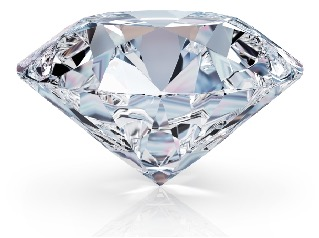

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DIAMONDS_DATASET = "/content/drive/MyDrive/!алгоритмы_понижения_размерности/diamonds_good.csv"

In [4]:
df_pl = pl.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [ ]:
df_pl.head(10)

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326.0,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326.0,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327.0,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334.0,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335.0,4.34,4.35,2.75
null,"""Very Good""","""J""","""VVS2""",62.8,57.0,336.0,3.94,3.96,2.48
0.24,"""Very Good""","""I""","""VVS1""",62.3,57.0,336.0,3.95,3.98,2.47
0.26,"""Very Good""","""H""","""SI1""",61.9,55.0,337.0,4.07,4.11,2.53
0.22,"""Fair""","""E""","""VS2""",65.1,61.0,337.0,3.87,3.78,2.49


In [ ]:
df_pl.tail()

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.72,"""Ideal""","""D""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""D""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""D""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56
0.86,"""Premium""","""H""","""SI2""",61.0,58.0,2757.0,6.15,6.12,3.74
0.75,"""Ideal""","""D""","""SI2""",62.2,55.0,2757.0,5.83,5.87,3.64


In [ ]:
df_pl.sample(3)

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
1.03,"""Fair""","""G""","""SI2""",65.7,59.0,2942.0,6.3,6.24,4.12
0.51,"""Fair""","""F""","""VVS2""",60.7,66.0,4368.0,5.21,5.11,3.13
1.21,"""Very Good""","""E""","""SI1""",62.9,58.0,6324.0,6.78,6.79,4.27


## Исследование данных

### Размер датасета

In [ ]:
df_pl.shape

(53940, 10)

### Информация о типах данных

In [ ]:
df_pl.schema

Schema([('carat', Float64),
        ('cut', String),
        ('color', String),
        ('clarity', String),
        ('depth', Float64),
        ('table', Float64),
        ('price', Float64),
        ("'x'", Float64),
        ("'y'", Float64),
        ("'z'", Float64)])

### Основные числовые характеристики + Пропуски в данных (null_count)

In [ ]:
df_pl.describe()

statistic,carat,cut,color,clarity,depth,table,price,'x','y','z'
str,f64,str,str,str,f64,f64,f64,f64,f64,f64
"""count""",53442.0,"""53940""","""53940""","""53940""",52950.0,53940.0,53940.0,53940.0,53935.0,53940.0
"""null_count""",498.0,"""0""","""0""","""0""",990.0,0.0,0.0,0.0,5.0,0.0
"""mean""",0.797561,null,null,null,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
"""std""",0.473534,null,null,null,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
"""min""",0.2,"""Fair""","""D""","""I1""",43.0,43.0,326.0,0.0,0.0,0.0
"""25%""",0.4,null,null,null,61.0,56.0,950.0,4.71,4.72,2.91
"""50%""",0.7,null,null,null,61.8,57.0,2401.0,5.7,5.71,3.53
"""75%""",1.04,null,null,null,62.5,59.0,5324.0,6.54,6.54,4.04
"""max""",5.01,"""Very Good""","""J""","""VVS2""",79.0,95.0,18823.0,10.74,58.9,31.8


### Дубликаты строк

Количество строк с дубликатами

In [ ]:
df_pl.is_duplicated().sum()

267

Фильтр строк с дубликатами

In [ ]:
df_pl.filter(df_pl.is_duplicated())

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
…,…,…,…,…,…,…,…,…,…
0.71,"""Good""","""F""","""SI2""",64.1,60.0,2130.0,0.0,0.0,0.0
0.51,"""Ideal""","""F""","""VVS2""",61.2,56.0,2203.0,5.19,5.17,3.17
0.51,"""Ideal""","""F""","""VVS2""",61.2,56.0,2203.0,5.19,5.17,3.17


Удаление дублированных строк (удалены 135 дубликатов)

In [ ]:
df_pl.shape

(53940, 10)

In [5]:
df_pl = df_pl.unique()

df_pl.shape

(53805, 10)

In [ ]:
df_pl.head()

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.3,"""Very Good""","""D""","""VS1""",62.0,55.0,863.0,4.31,4.35,2.68
0.52,"""Very Good""","""I""","""SI1""",60.3,61.0,1041.0,5.14,5.2,3.12
0.72,"""Very Good""","""H""","""VS2""",61.4,57.0,2462.0,5.75,5.79,3.54
0.32,"""Ideal""","""F""","""VVS1""",61.9,56.0,895.0,4.41,4.44,2.74
0.25,"""Very Good""","""E""","""VVS1""",61.5,56.0,560.0,4.06,4.08,2.5


## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

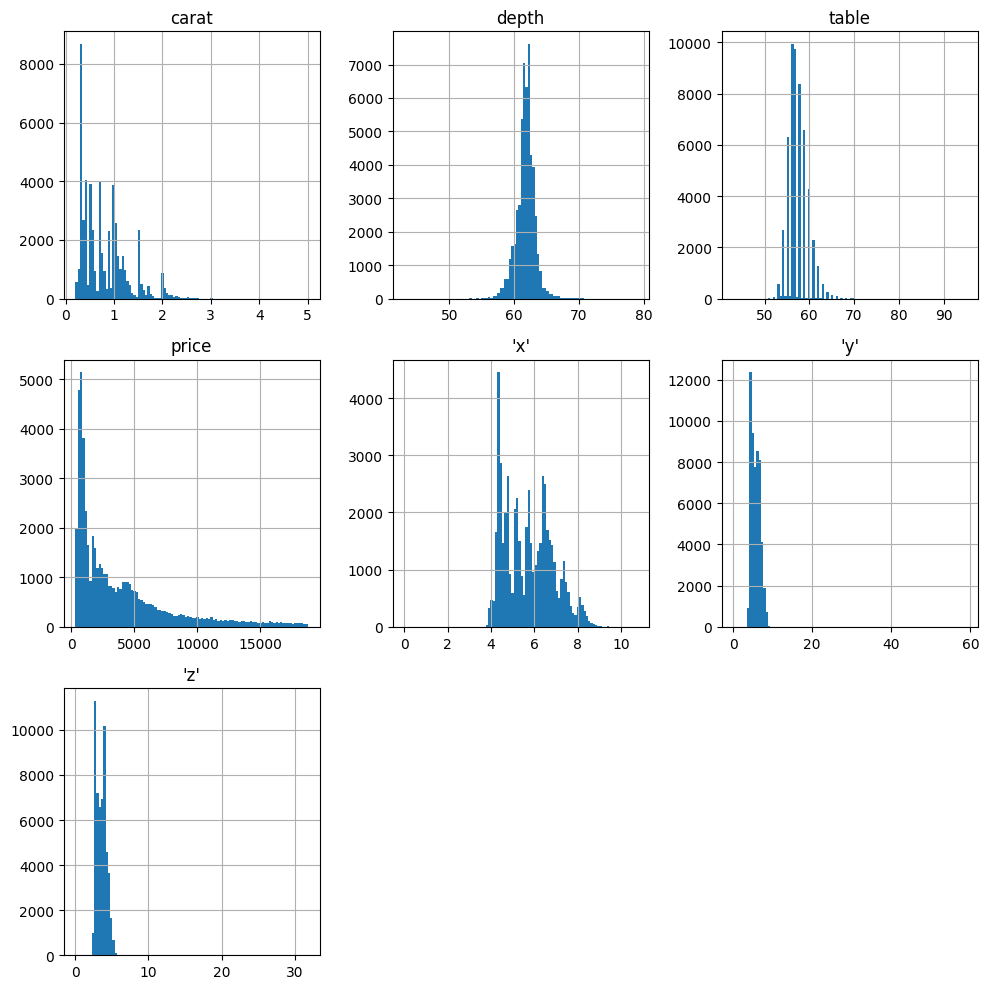

In [ ]:
cols = ["carat","depth","table","price","'x'","'y'","'z'"]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    ax.hist(df_pl[col].to_numpy(), bins=100)
    ax.set_title(col)
    ax.grid()

for ax in axes[len(cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### Проверка carat

процент нулевых значений

In [ ]:
f'Пустых значений catat: {df_pl['carat'].null_count() / len(df_pl) * 100:.1f} %'

'Пустых значений catat: 0.9 %'

заполнение пустых строк carat медианой

In [6]:
median_carat = round(df_pl['carat'].median(), 2)
print("Медиана carat: ", median_carat)

df_pl = df_pl.with_columns(
    pl.col('carat').fill_null(median_carat)
)
print(f'Пустых значений catat: {df_pl['carat'].null_count() / len(df_pl) * 100:.1f} %')

Медиана carat:  0.7
Пустых значений catat: 0.0 %


### Проверка depth

In [ ]:
f'Пустых значений depth: {df_pl['depth'].null_count() / len(df_pl) * 100:.1f} %'

'Пустых значений depth: 1.8 %'

Заполнение пустых значений depth медианой

In [7]:
median_depth = round(df_pl['depth'].median(), 2)
print("Медиана depth: ", median_depth)

df_pl = df_pl.with_columns(
    pl.col('depth').fill_null(median_depth)
)

print(f'Пустых значений depth: {df_pl['depth'].null_count() / len(df_pl) * 100:.1f} %')

Медиана depth:  61.8
Пустых значений depth: 0.0 %


### Проверка y

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [ ]:
f"Пустых значений 'y': {df_pl["'y'"].null_count() / len(df_pl) * 100:.2f} %"

"Пустых значений 'y': 0.01 %"

In [8]:
median_y = round(df_pl["'y'"].median(), 2)
print("Медиана 'y': ", median_y)

df_pl = df_pl.with_columns(
    pl.col("'y'").fill_null(median_depth)
)
print(f"Пустых значений 'y': {df_pl["'y'"].null_count() / len(df_pl) * 100:.2f} %")

Медиана 'y':  5.71
Пустых значений 'y': 0.00 %


## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

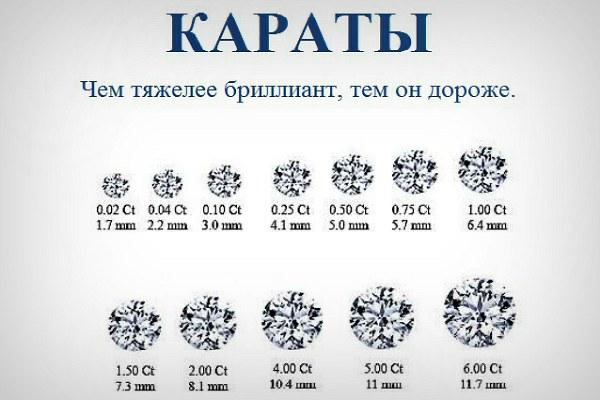

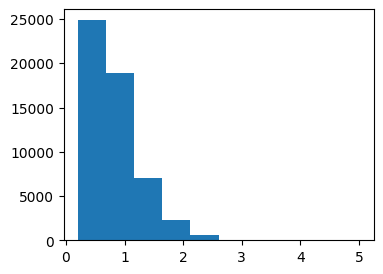

In [ ]:
plt.figure(figsize=(4,3))

plt.hist(df_pl['carat']);

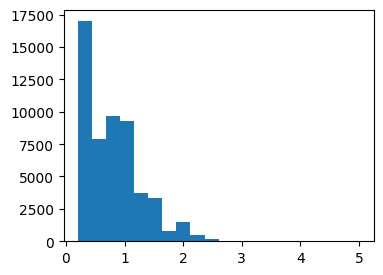

In [ ]:
plt.figure(figsize=(4,3))

plt.hist(df_pl['carat'], bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [ ]:
print('Самый тяжелый брилиант:', df_pl['carat'].max())
print('Самый легкий брилиант:', df_pl['carat'].min())

Самый тяжелый брилиант: 5.01
Самый легкий брилиант: 0.2


Сколько мелких бриллиантов в датасете?

In [ ]:
print('Мелких бриллиантов до 0.3 карат:',\
    len(df_pl.filter(pl.col('carat') < 0.3))\
    )

Мелких бриллиантов до 0.3 карат: 1582


Сколько процентов бриллиантов среди всего датасета - крупные?

In [ ]:
print(f'Крупных бриллиантов от 1 карат: {\
    round(len(df_pl.filter(pl.col('carat') >= 1)) / len(df_pl) * 100)\
} %')


Крупных бриллиантов от 1 карат: 35 %


Посмотрим как число карат влияет на стоимость алмаза

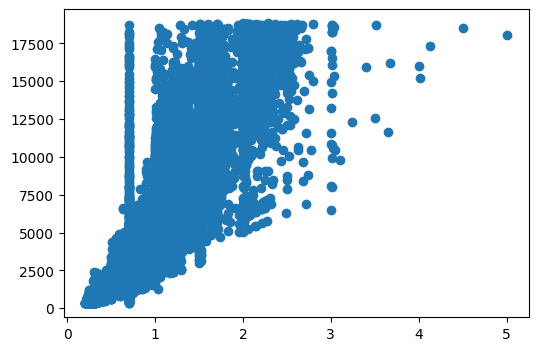

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df_pl['carat'], df_pl['price']);

коэффициент корреляции карат-цена

In [ ]:
round(np.corrcoef(df_pl['carat'], df_pl['price'])[0][1], 2)

np.float64(0.92)

### Cut (огранка алмаза)

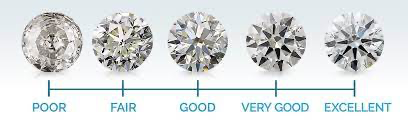

Заменить значение Goood на Good

In [ ]:
df_pl['cut'].value_counts(normalize=True)

cut,proportion
str,f64
"""Goood""",0.001487
"""Very Good""",0.224013
"""Ideal""",0.398941
"""Premium""",0.255088
"""Fair""",0.0297
"""Good""",0.090772


In [13]:
df_pl = df_pl.with_columns(
    pl.col('cut').replace({'Goood': 'Good'})
)
df_pl['cut'].value_counts(normalize=True)

cut,proportion
str,f64
"""Good""",0.092259
"""Very Good""",0.224013
"""Premium""",0.255088
"""Fair""",0.0297
"""Ideal""",0.398941


Посмотрим как влияет огранка алмаза на его стоимость

/tmp/ipython-input-2739867122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='price', data = df_pl, palette='summer')


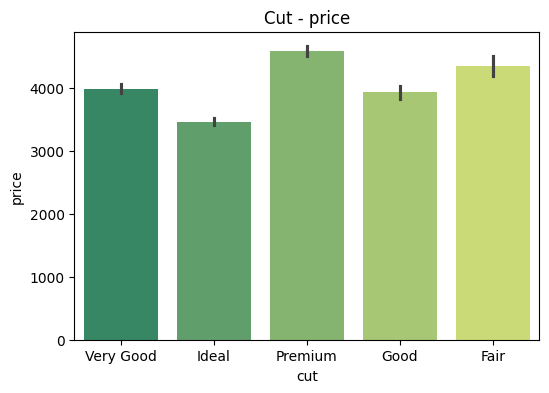

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='cut', y='price', data = df_pl, palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [ ]:
df_pl \
.filter(pl.col('cut') == 'Fair') \
.select(pl.col('carat')) \
.max()

carat
f64
5.01


Посчитаем среднюю стоимость алмазов в каждой категории

In [ ]:
df_pl \
.group_by('cut') \
.agg(
    pl.col('price') \
    .mean() \
    .round(2) \
    .alias('mean_price'))

cut,mean_price
str,f64
"""Premium""",4581.86
"""Ideal""",3462.59
"""Fair""",4347.74
"""Very Good""",3982.16
"""Good""",3926.27


Посчитаем несколько характеристик в зависимости от огранки

In [ ]:
df_pl \
.group_by('cut') \
.agg(
    pl.col('price').mean().round(2).alias('PriceMean'),
    pl.col('price').median().round(2).alias('PriceMedian'),
    pl.col('carat').mean().round(2).alias('CaratMean'))

cut,PriceMean,PriceMedian,CaratMean
str,f64,f64,f64
"""Ideal""",3462.59,1813.0,0.7
"""Good""",3926.27,3029.5,0.85
"""Premium""",4581.86,3175.0,0.89
"""Very Good""",3982.16,2649.0,0.8
"""Fair""",4347.74,3282.0,1.04


## Table and Depth

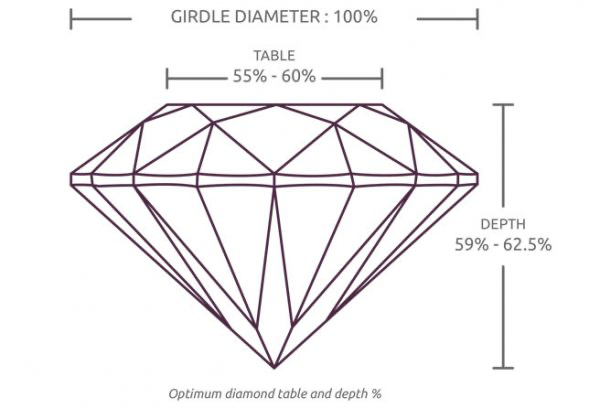

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [ ]:
optimal_table_per = len( \
    df_pl.filter((pl.col('table') >= 55) & (pl.col('table') <= 60)) \
    ) / len(df_pl) * 100

print(f'Доля алмазов с оптимальным table: {optimal_table_per:.1f} %')

Доля алмазов с оптимальным table: 84.4 %


### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [ ]:
optimal_table_depth_per = len( \
    df_pl.filter( \
        (pl.col('table') >= 55) \
        & (pl.col('table') <= 60) \
        & (pl.col('depth') >= 59) \
        & (pl.col('depth') <= 62.5)
        ) \
    ) / len(df_pl) * 100

print(f'Доля алмазов с оптимальным table и depth: {optimal_table_depth_per:.1f} %')

Доля алмазов с оптимальным table и depth: 62.1 %


### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [ ]:
# больше медиана стоимости всех алмазов
optimal_table_depth_price = \
    df_pl.filter( \
        (pl.col('table') >= 55) \
        & (pl.col('table') <= 60) \
        & (pl.col('depth') >= 59) \
        & (pl.col('depth') <= 62.5)
        )['price'].median()

median_price = df_pl['price'].median()

print(f'Медиана стоимости с оптимальными table и depth: {optimal_table_depth_price:.2f}')
print(f'Медиана стоимости: {median_price:.2f}')


Медиана стоимости с оптимальными table и depth: 2215.00
Медиана стоимости: 2401.00


Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [ ]:
# Параметр table больше влияет на цену, тк модуль коэффициента корреляции больше

In [ ]:
print(f'Корреляция table-price: {np.corrcoef(df_pl['table'], df_pl['price'])[0][1]:.4f}')
print(f'Корреляция depth-price: {np.corrcoef(df_pl['depth'], df_pl['price'])[0][1]:.4f}')

Корреляция table-price: 0.1266
Корреляция depth-price: -0.0108


## Clarity - прозрачность алмаза

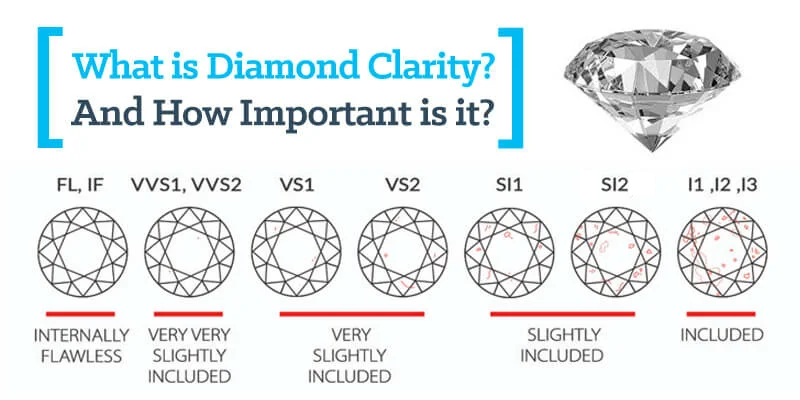

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [ ]:
# 8 градаций

df_pl['clarity'].value_counts()

clarity,count
str,u32
"""I1""",740
"""VVS2""",5056
"""SI2""",9154
"""SI1""",13035
"""VS1""",8157
"""IF""",1784
"""VS2""",12231
"""VVS1""",3648


### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [ ]:
vvsi_clatiry_per = len( \
    df_pl.filter( \
        (pl.col('clarity') == 'VVS1') \
        | (pl.col('clarity') == 'VVS2') \
        ) \
    ) / len(df_pl) * 100

print(f'Доля алмазов VVSI: {vvsi_clatiry_per:.1f} %')

Доля алмазов VVSI: 16.2 %


### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

/tmp/ipython-input-2899296155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='clarity', y='price', data = df_pl, palette='summer')


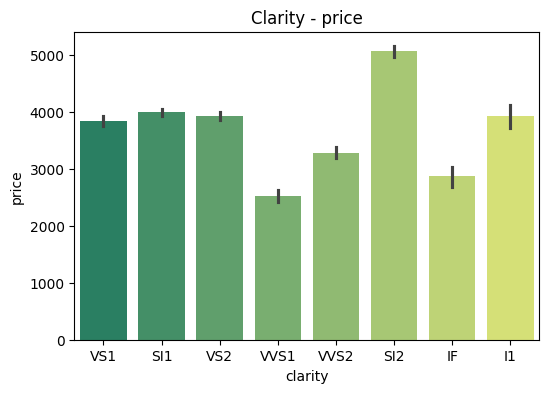

In [ ]:
# Slightly Included (SI2) стоят дороже остальных

plt.figure(figsize=(6,4))

sns.barplot(x='clarity', y='price', data = df_pl, palette='summer')
plt.title('Clarity - price')
plt.show();

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [ ]:
# Алмазы огранки Premium с Slightly Included SI2 clarity
# имеют наибольшую среднюю стоимость

df_pl.group_by(['cut', 'clarity']).agg(
    pl.col('price').mean().alias('PriceMean'),
    pl.col('price').median().alias('PriceMedian'),
).sort('PriceMean', descending=True).to_pandas()

,cut,clarity,PriceMean,PriceMedian
0,Premium,SI2,5556.262491,4292.5
1,Fair,SI2,5145.740175,3681.0
2,Very Good,SI2,4988.709447,4042.0
3,Ideal,SI2,4761.711917,4068.0
4,Good,SI2,4544.119816,3763.0
5,Premium,VS2,4539.441053,2724.0
6,Premium,VS1,4491.247730,2362.0
7,Premium,SI1,4451.865244,3618.0
8,Very Good,IF,4373.299625,1708.0
9,Ideal,I1,4335.726027,3673.5


# Домашнее задание

## 1) x, y, z

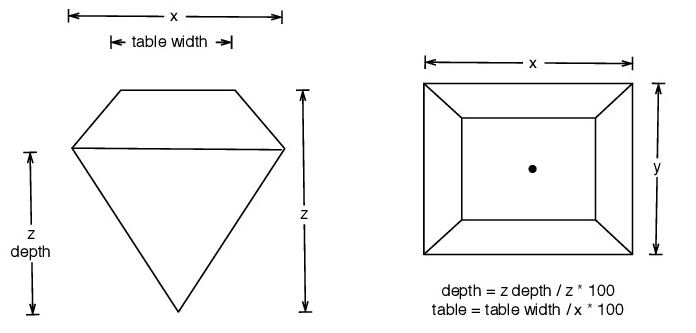

In [ ]:
df_pl.columns

['carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 "'x'",
 "'y'",
 "'z'"]

Переименуем колонки

In [28]:
df_pl = df_pl.rename({
    "'x'": 'x',
    "'y'": 'y',
    "'z'": 'z'
})


In [ ]:
df_pl.columns

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [ ]:
# ваш код здесь
sizes_medians = {
    'x_median': df_pl['x'].median(),
    'y_median': df_pl['y'].median(),
    'z_median': df_pl['z'].median(),
}
max_median = max(sizes_medians.values())
print('Max median')
for key, value in sizes_medians.items():
    if value == max_median:
        print(key, '=', value)

Max median
y_median = 5.71


Для каждого из этих столбцов вычислите минимальное значение.

In [ ]:
df_pl['x'].min(), df_pl['y'].min(), df_pl['z'].min()

(0.0, 0.0, 0.0)

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [ ]:
fault_x_y_z_df_pl = df_pl.filter( \
    (pl.col('x') == pl.col('x').min()) \
    | (pl.col('y') == pl.col('y').min()) \
    | (pl.col('z') == pl.col('z').min()) \
)

print('Количество строк:',len(fault_x_y_z_df_pl))
fault_x_y_z_df_pl.to_pandas()

Количество строк: 19


,carat,cut,color,clarity,depth,table,price,x,y,z
0,2.20,Premium,H,SI1,61.2,59.0,17265.0,8.42,8.37,0.0
1,1.14,Fair,G,VS1,57.5,67.0,6381.0,0.00,0.00,0.0
2,2.18,Premium,H,SI2,59.4,61.0,12631.0,8.49,8.45,0.0
3,2.80,Good,G,SI2,63.8,58.0,18788.0,8.90,8.85,0.0
4,1.00,Premium,G,SI2,59.1,59.0,3142.0,6.55,6.48,0.0
5,1.20,Premium,D,VVS1,62.1,59.0,15686.0,0.00,0.00,0.0
6,2.25,Premium,H,SI2,62.8,59.0,18034.0,0.00,0.00,0.0
7,1.56,Ideal,G,VS2,62.2,54.0,12800.0,0.00,0.00,0.0
8,1.01,Premium,F,SI2,59.2,58.0,3837.0,6.50,6.47,0.0
9,1.07,Ideal,F,SI2,61.6,56.0,4954.0,0.00,6.62,0.0


### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [ ]:
# 53786 строк осталось
df_pl = df_pl.filter( \
    ~((pl.col('x') == pl.col('x').min()) \
    | (pl.col('y') == pl.col('y').min()) \
    | (pl.col('z') == pl.col('z').min())) \
)

df_pl.shape

(53786, 10)

минимальные значения

In [ ]:
df_pl['x'].min(), df_pl['y'].min(), df_pl['z'].min()

(3.73, 3.68, 1.07)

### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [ ]:
# Наибольшая корреляция цены с размером x
price_sizes_corr = {
    'price_x_corr': round(np.corrcoef(df_pl['price'], df_pl['x'])[0][1], 4),
    'price_y_corr': round(np.corrcoef(df_pl['price'], df_pl['y'])[0][1], 4),
    'price_z_corr': round(np.corrcoef(df_pl['price'], df_pl['z'])[0][1], 4),
}
max_corr = \
    max(price_sizes_corr.values()) \
    if abs(max(price_sizes_corr.values())) > abs(min(price_sizes_corr.values())) \
    else min(price_sizes_corr.values())
print('Max correlation')
for key, value in price_sizes_corr.items():
    if value == max_corr:
        print(key, '=', value)

Max correlation
price_x_corr = 0.8872


### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

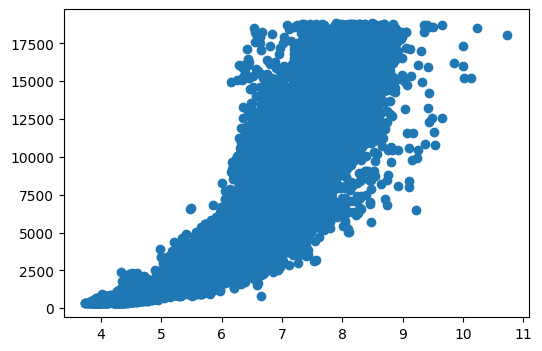

In [ ]:
# Зависимость цены от размера x больше похожа на экспоненциальную
plt.figure(figsize=(6,4))

plt.scatter(df_pl['x'], df_pl['price'])

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [ ]:
big_x_y_sizes_per = len( \
    df_pl.filter( \
        (pl.col('x') > pl.col('x').mean()) \
        & (pl.col('y') > pl.col('y').mean())
        ) \
    ) / len(df_pl) * 100

print(f'Доля алмазов с x и y больше среднего: {big_x_y_sizes_per:.0f} %')

Доля алмазов с x и y больше среднего: 47 %


### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [ ]:
small_z_per = len( \
    df_pl.filter( \
        (pl.col('z') < pl.col('z').median()) \
        & (pl.col('carat') >= 1)
        ) \
    ) / len(df_pl) * 100

print(f'Доля крупных алмазов с z меньше медианы: {small_z_per:.4f} %')

Доля крупных алмазов с z меньше медианы: 0.0074 %


## 2) Color

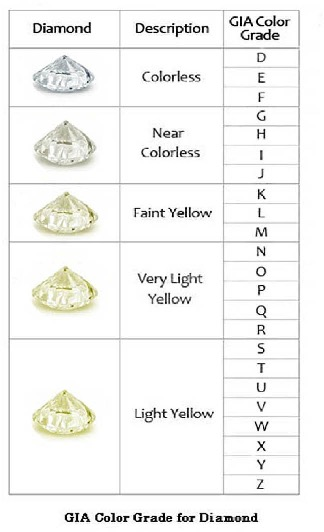

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [ ]:
# Near Coloress: G, H, I, J
# Colorless: D E F
df_pl['color'].value_counts(normalize=True)

color,proportion
str,f64
"""D""",0.12559
"""F""",0.176961
"""J""",0.052095
"""I""",0.100547
"""E""",0.181776
"""G""",0.209274
"""H""",0.153757


### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

In [ ]:
df_pl = df_pl.with_columns(
    pl.when(
         pl.col('color') \
         .is_in(['G', 'H', 'I', 'J'])) \
    .then(pl.lit('Near Coloress')) \
    .otherwise(pl.lit('Colorless')) \
    .alias('color_description')
)
df_pl

carat,cut,color,clarity,depth,table,price,x,y,z,color_description
f64,str,str,str,f64,f64,f64,f64,f64,f64,str
0.3,"""Very Good""","""D""","""VS1""",62.0,55.0,863.0,4.31,4.35,2.68,"""Colorless"""
0.52,"""Very Good""","""I""","""SI1""",60.3,61.0,1041.0,5.14,5.2,3.12,"""Near Coloress"""
0.72,"""Very Good""","""H""","""VS2""",61.4,57.0,2462.0,5.75,5.79,3.54,"""Near Coloress"""
0.32,"""Ideal""","""F""","""VVS1""",61.9,56.0,895.0,4.41,4.44,2.74,"""Colorless"""
0.25,"""Very Good""","""E""","""VVS1""",61.5,56.0,560.0,4.06,4.08,2.5,"""Colorless"""
…,…,…,…,…,…,…,…,…,…,…
1.06,"""Ideal""","""F""","""SI1""",61.2,55.0,4862.0,6.62,6.57,4.03,"""Colorless"""
0.4,"""Good""","""D""","""VS1""",60.5,63.0,954.0,4.75,4.77,2.88,"""Colorless"""
1.0,"""Premium""","""F""","""SI1""",62.6,60.0,5292.0,6.32,6.3,3.95,"""Colorless"""


In [ ]:
df_pl['color_description'].value_counts(normalize=True)

color_description,proportion
str,f64
"""Colorless""",0.484327
"""Near Coloress""",0.515673


/tmp/ipython-input-1465683875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color_description', y='price', data = df_pl, palette='summer')


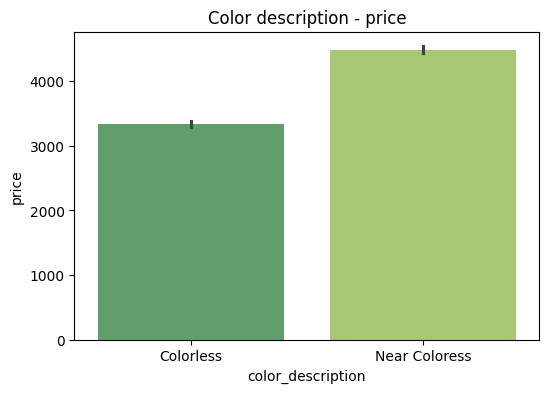

In [ ]:
# зависимость стоимости от категории цвета

plt.figure(figsize=(6,4))

sns.barplot(x='color_description', y='price', data = df_pl, palette='summer')
plt.title('Color description - price')
plt.show();

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [ ]:
# В разрезе цвета медиана карат убывает вместе с медианой цены
df_pl.group_by('color').agg(
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').median().alias('CaratMedian')
).sort('PriceMedian', descending=True)

color,PriceMedian,CaratMedian
str,f64,f64
"""J""",4234.5,1.11
"""I""",3721.5,1.0
"""H""",3449.5,0.9
"""F""",2345.0,0.7
"""G""",2242.0,0.7
"""D""",1842.0,0.54
"""E""",1741.0,0.54


### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [ ]:
# Дороже остальных алмазы (Very Good,	D,	IF)
df_pl.group_by(['cut', 'color', 'clarity']).agg(
    pl.col('price').mean().alias('PriceMean')
).sort('PriceMean', descending=True)

cut,color,clarity,PriceMean
str,str,str,f64
"""Very Good""","""D""","""IF""",10298.26087
"""Good""","""D""","""IF""",10030.333333
"""Ideal""","""J""","""I1""",9454.0
"""Premium""","""D""","""IF""",9056.5
"""Premium""","""J""","""SI2""",7550.285714
…,…,…,…
"""Good""","""E""","""IF""",1519.222222
"""Ideal""","""I""","""IF""",1509.404255
"""Fair""","""G""","""IF""",1488.0


# Разведочный анализ данных: энкодинг и обучение

**Цели на сегодня:**

* Исследовать корреляцию характеристик алмазов

* Оценить значимость признаков и провести пермутацию

* Обучить и сравнить модели с целевым признаком стоимостью

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

In [31]:
df_pl_encoded = df_pl.lazy().collect()

In [11]:
df_pl_encoded.schema

Schema([('carat', Float64),
        ('cut', String),
        ('color', String),
        ('clarity', String),
        ('depth', Float64),
        ('table', Float64),
        ('price', Float64),
        ("'x'", Float64),
        ("'y'", Float64),
        ("'z'", Float64)])

## Data encoding

Преобразование 'cut'

In [32]:
cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

df_pl_encoded = df_pl_encoded.with_columns(
    pl.col('cut')
    .map_elements(lambda x: cut_order[x])
    .alias('cut_encoded')
)

df_pl_encoded.head()

/tmp/ipython-input-1690520102.py:5: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("cut").map_elements(lambda x: ...)
with this one instead:
  + pl.col("cut").replace_strict(cut_order)

  .map_elements(lambda x: cut_order[x])
/tmp/ipython-input-1690520102.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df_pl_encoded = df_pl_encoded.with_columns(


carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded
f64,str,str,str,f64,f64,f64,f64,f64,f64,i64
1.24,"""Premium""","""J""","""VS2""",61.4,59.0,5026.0,6.91,6.83,4.22,3
0.32,"""Very Good""","""G""","""VVS1""",61.2,59.0,876.0,4.41,4.45,2.71,2
0.36,"""Premium""","""E""","""VS2""",62.0,57.0,1080.0,4.57,4.52,2.82,3
0.4,"""Ideal""","""E""","""VS2""",62.6,57.0,975.0,4.73,4.7,2.95,4
0.3,"""Ideal""","""E""","""VVS1""",60.1,57.0,956.0,4.41,4.38,2.64,4


Преобразование 'clarity'

In [33]:
clarity_order = {'IF': 1, 'VVS2': 2, 'VVS1': 2, 'VS1': 3, 'VS2': 4, 'SI1': 5, 'SI2': 6, 'I1': 7}

df_pl_encoded = df_pl_encoded.with_columns(
    pl.col('clarity')
    .map_elements(lambda x: clarity_order[x])
    .alias('clarity_encoded')
)
df_pl_encoded.head()

/tmp/ipython-input-269953111.py:5: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("clarity").map_elements(lambda x: ...)
with this one instead:
  + pl.col("clarity").replace_strict(clarity_order)

  .map_elements(lambda x: clarity_order[x])
/tmp/ipython-input-269953111.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df_pl_encoded = df_pl_encoded.with_columns(


carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,clarity_encoded
f64,str,str,str,f64,f64,f64,f64,f64,f64,i64,i64
1.24,"""Premium""","""J""","""VS2""",61.4,59.0,5026.0,6.91,6.83,4.22,3,4
0.32,"""Very Good""","""G""","""VVS1""",61.2,59.0,876.0,4.41,4.45,2.71,2,2
0.36,"""Premium""","""E""","""VS2""",62.0,57.0,1080.0,4.57,4.52,2.82,3,4
0.4,"""Ideal""","""E""","""VS2""",62.6,57.0,975.0,4.73,4.7,2.95,4,4
0.3,"""Ideal""","""E""","""VVS1""",60.1,57.0,956.0,4.41,4.38,2.64,4,2


One hot преобразование 'color'

In [34]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

one_hot_encoded = encoder.fit_transform(
    df_pl_encoded['color'].to_numpy().reshape(-1, 1)
    )
one_hot_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
cols = list(encoder.get_feature_names_out(['color']))

one_hot_df = pl.DataFrame(one_hot_encoded, schema=cols)

df_pl_encoded = pl.concat([df_pl_encoded, one_hot_df], how='horizontal')
df_pl_encoded.head(10)

carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,clarity_encoded,color_D,color_E,color_F,color_G,color_H,color_I,color_J
f64,str,str,str,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64
1.24,"""Premium""","""J""","""VS2""",61.4,59.0,5026.0,6.91,6.83,4.22,3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0.32,"""Very Good""","""G""","""VVS1""",61.2,59.0,876.0,4.41,4.45,2.71,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0.36,"""Premium""","""E""","""VS2""",62.0,57.0,1080.0,4.57,4.52,2.82,3,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0.4,"""Ideal""","""E""","""VS2""",62.6,57.0,975.0,4.73,4.7,2.95,4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0.3,"""Ideal""","""E""","""VVS1""",60.1,57.0,956.0,4.41,4.38,2.64,4,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0.36,"""Very Good""","""E""","""SI1""",61.3,56.0,631.0,4.58,4.62,2.82,2,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0.31,"""Premium""","""G""","""VS1""",61.2,60.0,625.0,4.37,4.39,2.68,3,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0.32,"""Ideal""","""G""","""VS2""",61.8,57.0,561.0,4.37,4.4,2.71,4,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2.02,"""Very Good""","""I""","""VS2""",63.2,53.0,16179.0,8.09,8.18,5.14,2,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Correlation. Heat Map

Дроп строковых столбцов

In [19]:
df_pl_encoded.schema

Schema([('carat', Float64),
        ('cut', String),
        ('color', String),
        ('clarity', String),
        ('depth', Float64),
        ('table', Float64),
        ('price', Float64),
        ("'x'", Float64),
        ("'y'", Float64),
        ("'z'", Float64),
        ('cut_encoded', Int64),
        ('clarity_encoded', Int64),
        ('color_D', Float64),
        ('color_E', Float64),
        ('color_F', Float64),
        ('color_G', Float64),
        ('color_H', Float64),
        ('color_I', Float64),
        ('color_J', Float64)])

In [36]:
df_pl_encoded = df_pl_encoded.drop(pl.col(pl.String))
df_pl_encoded.schema

Schema([('carat', Float64),
        ('depth', Float64),
        ('table', Float64),
        ('price', Float64),
        ('x', Float64),
        ('y', Float64),
        ('z', Float64),
        ('cut_encoded', Int64),
        ('clarity_encoded', Int64),
        ('color_D', Float64),
        ('color_E', Float64),
        ('color_F', Float64),
        ('color_G', Float64),
        ('color_H', Float64),
        ('color_I', Float64),
        ('color_J', Float64)])

In [ ]:
corr_mat = df_pl_encoded.corr()

Значения корреляции для всех атрибутов

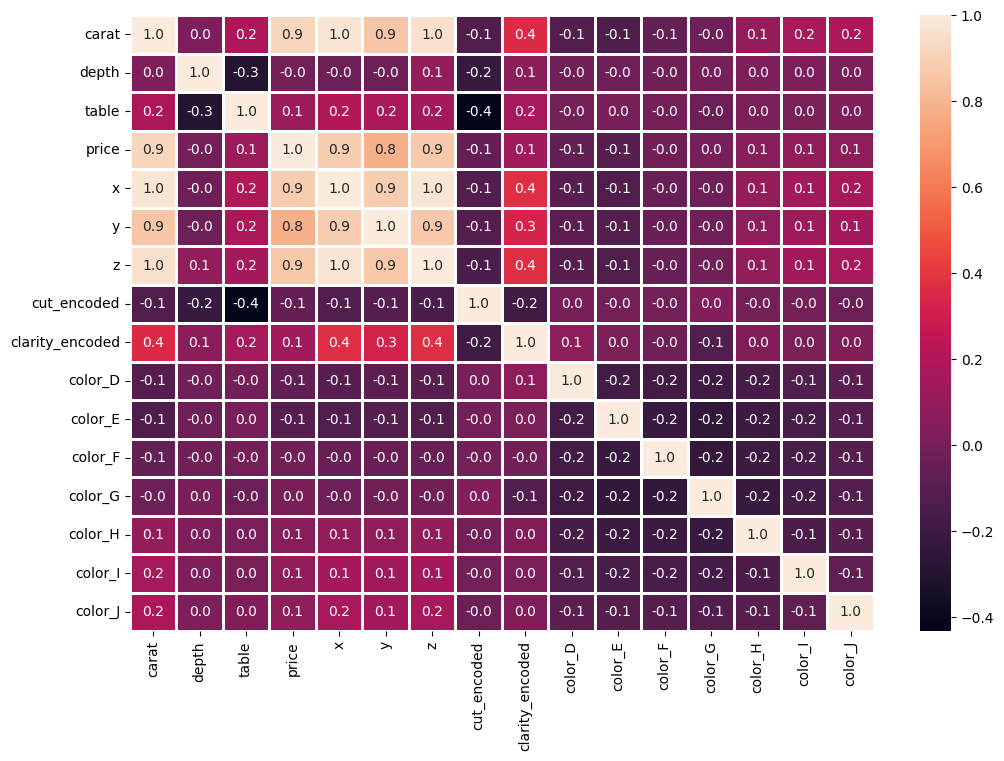

In [ ]:
plt.figure(figsize=(12,8))


ax = sns.heatmap(corr_mat, annot=True, fmt='.1f', linewidth=1)
ax.set_xticklabels(df_pl_encoded.columns, rotation=90)
ax.set_yticklabels(df_pl_encoded.columns, rotation=0)

plt.show()

Уберем 'x', 'y', 'z'.

In [ ]:
corr_mat = df_pl_encoded.drop(['x','y','z']).corr()

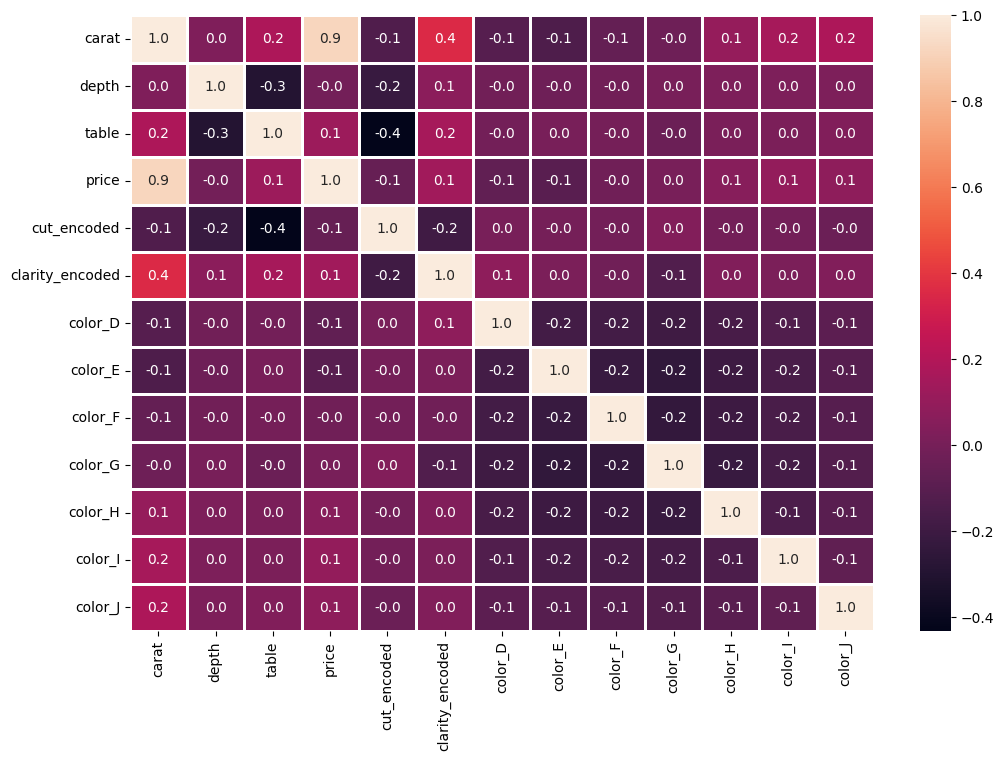

In [ ]:
plt.figure(figsize=(12,8))
cols = df_pl_encoded.drop(['x','y','z']).columns

ax = sns.heatmap(corr_mat, annot=True, fmt='.1f', linewidth=1)
ax.set_xticklabels(cols, rotation=90)
ax.set_yticklabels(cols, rotation=0)

plt.show()

### Как распадаются данные по парам фич

Смотрим распределение признаков, тк у нас не все они распределены нормально. Чем ближе данные к номральному распределению, тем больше подвергаются базовому анализу

пары фич price-depth, price-table коррелируют между собой.
Зависимость price-carat схожа с price-x

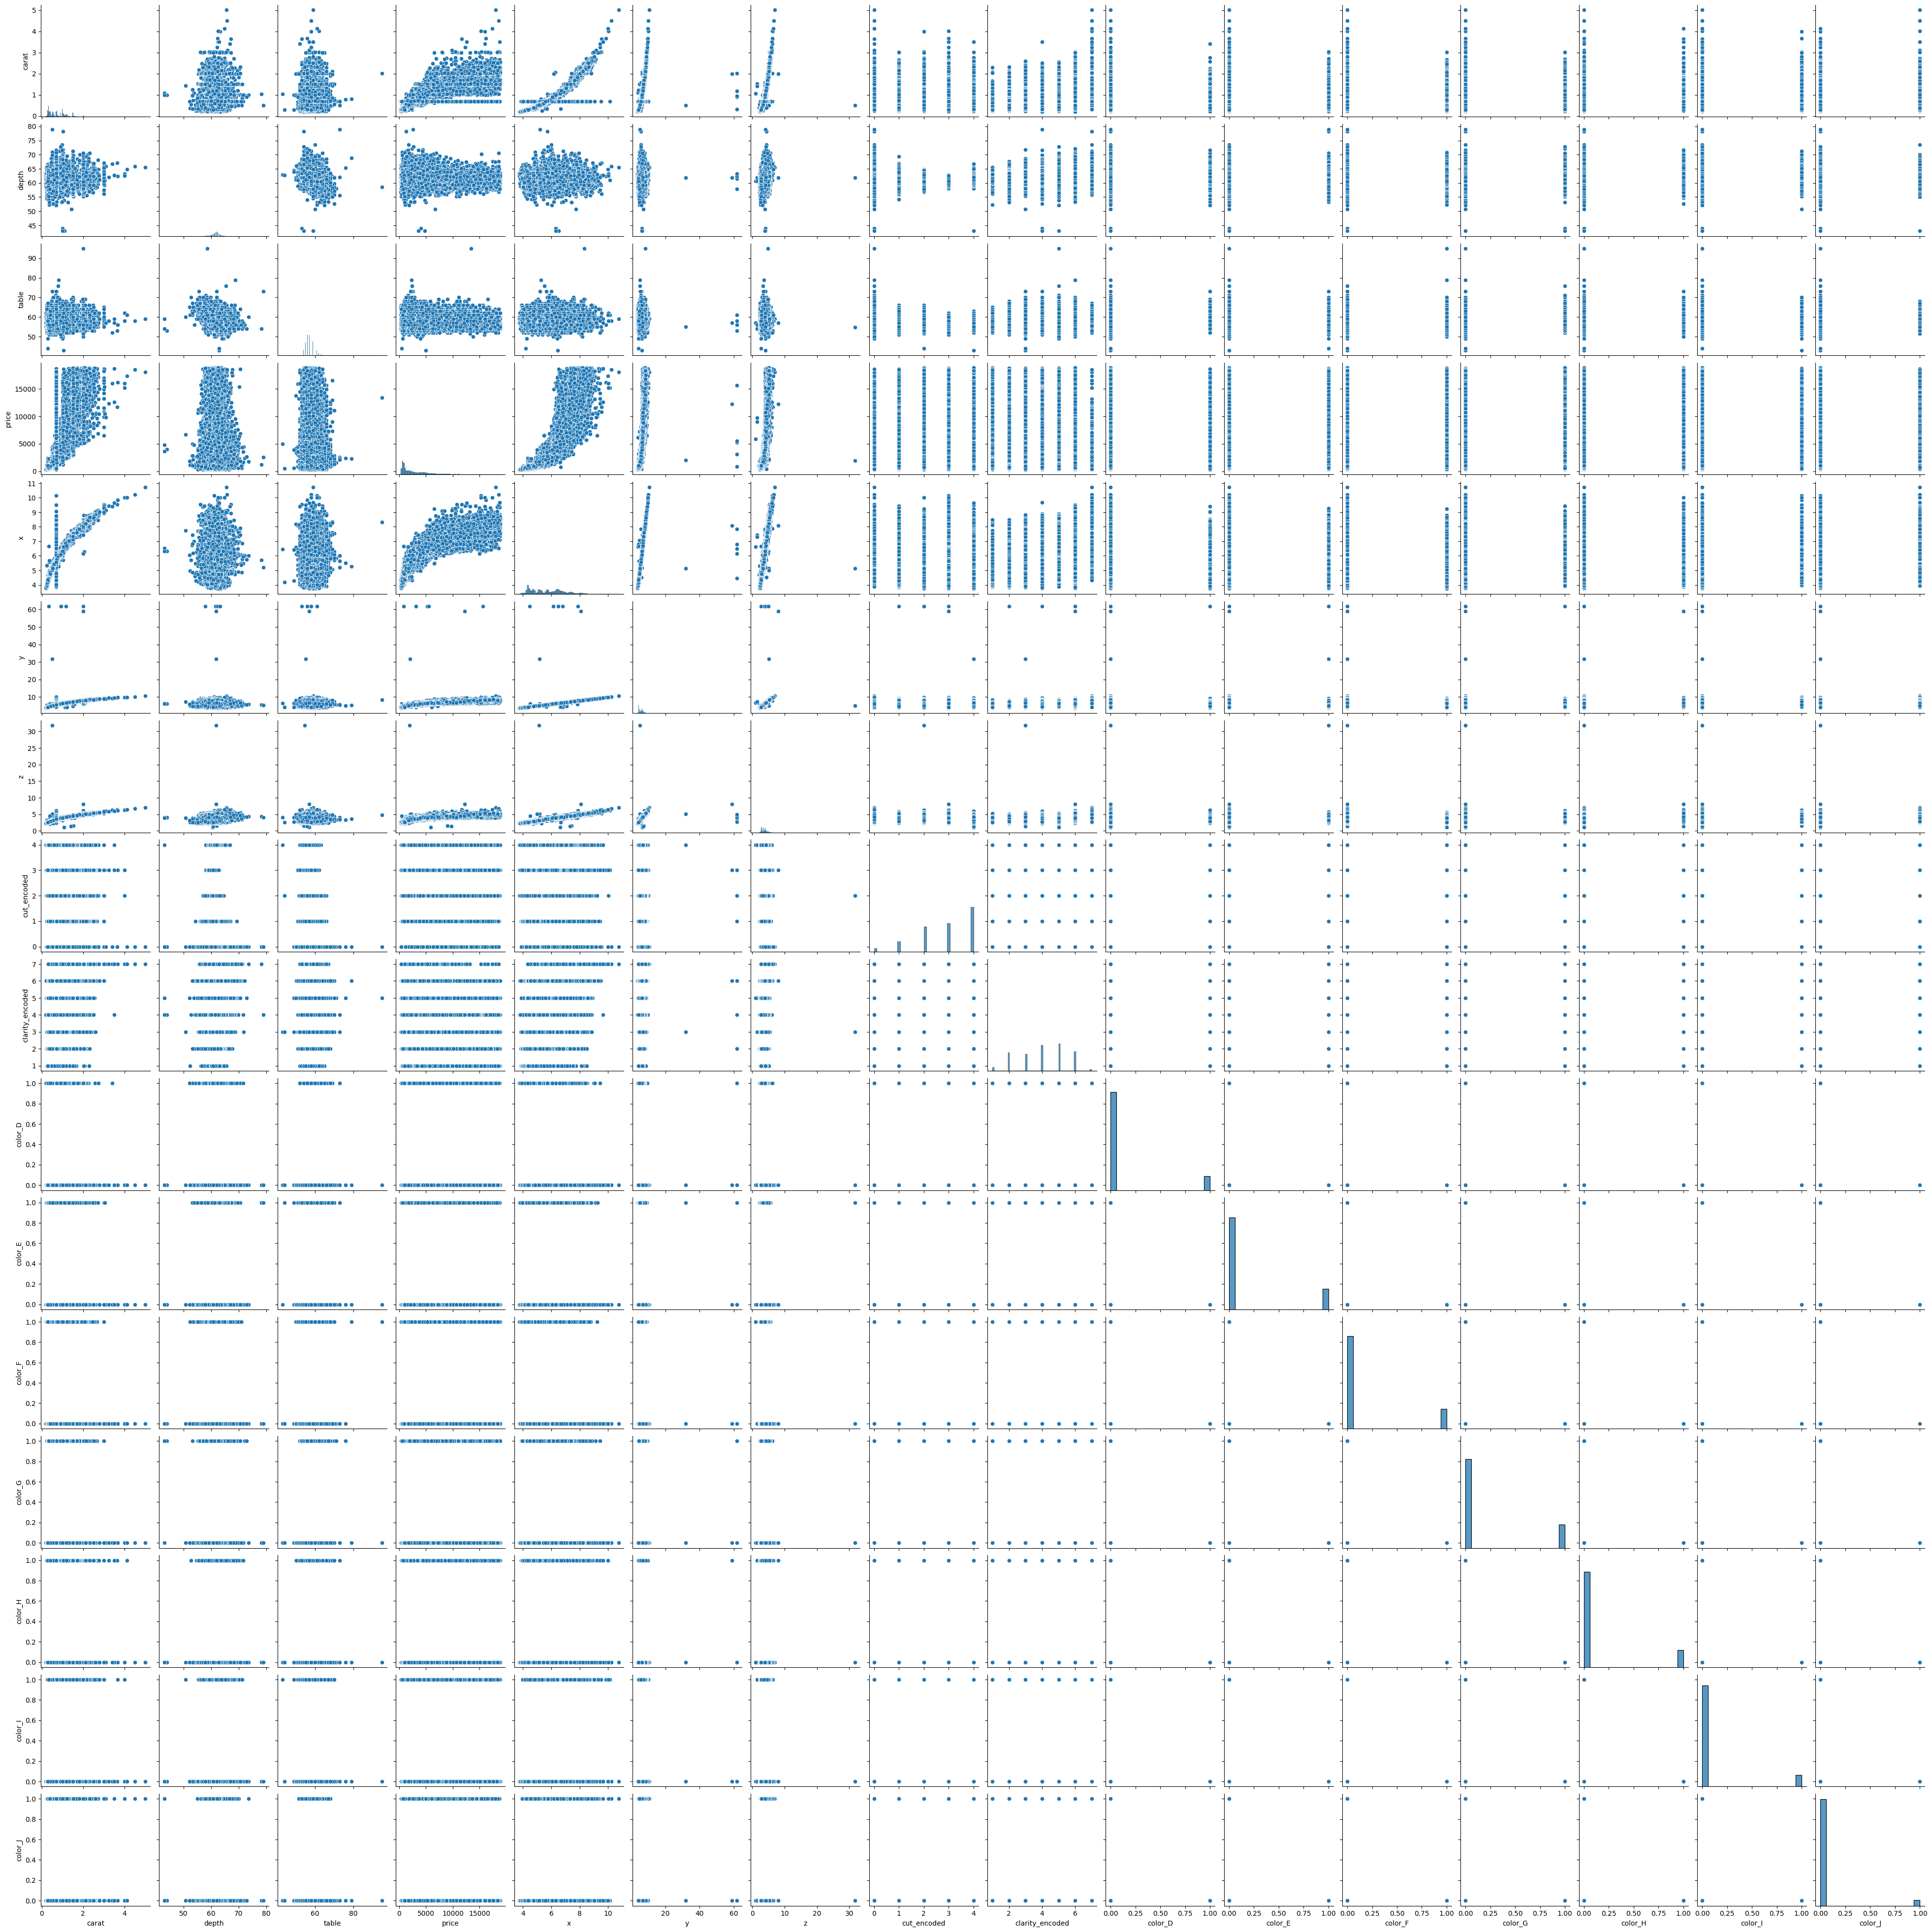

In [ ]:
sns.pairplot(df_pl_encoded.to_pandas())

##  Оценка важности фич

Разделение X и y

In [37]:
X = df_pl_encoded.drop(['price'])
y = df_pl_encoded['price']

In [ ]:
X.head()

carat,depth,table,x,y,z,cut_encoded,clarity_encoded,color_D,color_E,color_F,color_G,color_H,color_I,color_J
f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64
0.3,62.0,55.0,4.31,4.35,2.68,2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0.52,60.3,61.0,5.14,5.2,3.12,2,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.72,61.4,57.0,5.75,5.79,3.54,2,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0.32,61.9,56.0,4.41,4.44,2.74,4,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.25,61.5,56.0,4.06,4.08,2.5,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
y.head()

price
f64
5026.0
876.0
1080.0
975.0
956.0
631.0
625.0
561.0
16179.0


### Случайный лес




In [ ]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=43)
random_forest.fit(X, y)

feature_importances_series = pl.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort(by='Importance', descending=True)
feature_importances_series

Feature,Importance
str,f64
"""y""",0.862417
"""clarity_encoded""",0.062317
"""carat""",0.014582
"""x""",0.014183
"""color_J""",0.011008
…,…
"""color_G""",0.002456
"""table""",0.002341
"""color_E""",0.001736


#### Permutation importance

In [ ]:
res_rand_forest = permutation_importance(random_forest, X, y, n_repeats=10, n_jobs=-1, random_state=35)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
ir = res_rand_forest.importances_mean.argsort()[::-1]
for i in ir:
  print(f'{X.columns[i]}: {res_rand_forest.importances_mean[i]:.3f} std {res_rand_forest.importances_std[i]:.3f}')

y: 1.094 std 0.007
clarity_encoded: 0.167 std 0.002
x: 0.078 std 0.000
color_J: 0.041 std 0.000
carat: 0.040 std 0.000
z: 0.033 std 0.000
color_I: 0.033 std 0.000
color_H: 0.019 std 0.000
color_D: 0.013 std 0.000
color_G: 0.009 std 0.000
color_E: 0.008 std 0.000
color_F: 0.007 std 0.000
depth: 0.004 std 0.000
cut_encoded: 0.003 std 0.000
table: 0.003 std 0.000


#### Вывод
Значимые характеристики 'y' и 'clarity'

### Градиентный спуск

In [ ]:
gradient_boosting = GradientBoostingRegressor(random_state=43)
gradient_boosting.fit(X, y)

feature_importances_series = pl.DataFrame({
    'Feature': X.columns,
    'Importance': gradient_boosting.feature_importances_
}).sort(by='Importance', descending=True)
feature_importances_series

Feature,Importance
str,f64
"""y""",0.785865
"""z""",0.106216
"""clarity_encoded""",0.058336
"""x""",0.017126
"""carat""",0.010106
…,…
"""color_G""",0.000845
"""color_E""",0.000717
"""cut_encoded""",0.000366


#### Permutation importance

In [ ]:
res_grad_boost = permutation_importance(gradient_boosting, X, y, n_repeats=10, n_jobs=-1, random_state=35)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
ir = res_grad_boost.importances_mean.argsort()[::-1]
for i in ir:
  print(f'{X.columns[i]}: {res_grad_boost.importances_mean[i]:.3f} std {res_grad_boost.importances_std[i]:.3f}')

y: 0.851 std 0.004
z: 0.171 std 0.001
clarity_encoded: 0.131 std 0.001
carat: 0.036 std 0.000
x: 0.022 std 0.000
color_J: 0.020 std 0.000
color_I: 0.010 std 0.000
color_D: 0.007 std 0.000
color_E: 0.004 std 0.000
color_H: 0.003 std 0.000
color_F: 0.003 std 0.000
cut_encoded: 0.001 std 0.000
color_G: 0.001 std 0.000
depth: 0.000 std 0.000
table: 0.000 std 0.000


#### Вывод
Значимые характеристики 'y', 'z' и 'clarity'

### Линейная регрессия

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
lin_regres = LinearRegression()
lin_regres.fit(X_scaled, y)

LinearRegression()

In [ ]:
feature_importances_series = pl.DataFrame({
    'Feature': X.columns,
    'Coeff': lin_regres.coef_,
    'Coeff_abs': np.abs(lin_regres.coef_)
}).sort(by='Coeff_abs', descending=True)
feature_importances_series

Feature,Coeff,Coeff_abs
str,f64,f64
"""carat""",4192.746052,4192.746052
"""clarity_encoded""",-842.994521,842.994521
"""color_J""",-361.018871,361.018871
"""color_I""",-226.104048,226.104048
"""color_D""",212.676627,212.676627
…,…,…
"""table""",-48.98309,48.98309
"""color_G""",39.416376,39.416376
"""x""",-35.350318,35.350318


#### Permutation importance

In [ ]:
res_lin_reg = permutation_importance(lin_regres, X_scaled, y, n_repeats=10, n_jobs=-1, random_state=35)

In [ ]:
ir = res_lin_reg.importances_mean.argsort()[::-1]
for i in ir:
  print(f'{X.columns[i]}: {res_lin_reg.importances_mean[i]:.3f} std {res_lin_reg.importances_std[i]:.3f}')

carat: 2.211 std 0.009
clarity_encoded: 0.089 std 0.001
color_J: 0.016 std 0.000
color_I: 0.006 std 0.000
color_D: 0.006 std 0.000
color_E: 0.003 std 0.000
cut_encoded: 0.002 std 0.000
color_H: 0.002 std 0.000
color_F: 0.002 std 0.000
depth: 0.001 std 0.000
table: 0.000 std 0.000
color_G: 0.000 std 0.000
x: 0.000 std 0.000
z: 0.000 std 0.000
y: 0.000 std 0.000


#### Вывод
Значимые характеристики 'carat', 'clarity'

## Обучение моделей

In [21]:
def training_by_features(X_, y_, model):
    y_bins = y_.qcut(10) # 10 квантилей

    X_train, X_test, y_train, y_test = train_test_split(
        X_, y_, test_size=0.3, random_state=42, stratify=y_bins)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return mean_absolute_percentage_error(y_test, y_pred)

### Логистическая регрессия. Фичи: carat, clarity

In [38]:
X_scaled = StandardScaler().fit_transform(X.select(pl.col('carat', 'clarity_encoded')))
lin_reg_model = LinearRegression()
mape = training_by_features(X_scaled, y, LinearRegression())

In [39]:
res = {'mape': [mape], 'model': ['LinearRegression'], 'features': [['carat', 'clarity']]}

### Логистическая регрессия. Фичи: y, clarity

In [40]:
X_scaled = StandardScaler().fit_transform(X.select(pl.col('y', 'clarity_encoded')))
lin_reg_model = LinearRegression()
mape = training_by_features(X_scaled, y, LinearRegression())

res['mape'].append(mape)
res['model'].append('LinearRegression')
res['features'].append(['y', 'clarity'])


### Логистическая регрессия. Фичи: cut, carat, clarity

In [41]:
X_scaled = StandardScaler().fit_transform(X.select(pl.col('carat', 'clarity_encoded', 'cut_encoded')))
lin_reg_model = LinearRegression()
mape = training_by_features(X_scaled, y, LinearRegression())

res['mape'].append(mape)
res['model'].append('LinearRegression')
res['features'].append(['carat', 'clarity', 'cut'])


### Логистическая регрессия. Фичи: all

In [42]:
X_scaled = StandardScaler().fit_transform(X)
lin_reg_model = LinearRegression()
mape = training_by_features(X_scaled, y, LinearRegression())

res['mape'].append(mape)
res['model'].append('LinearRegression')
res['features'].append(['all'])

## Оценка моделей

In [43]:

mapes_df = pl.DataFrame(res).sort(by='mape')
mapes_df = mapes_df.with_columns(
    pl.col('mape')
    .map_elements(lambda x: f'{x * 100:.1f} %')
    .alias('mape')
    )
mapes_df

/tmp/ipython-input-4220346022.py:2: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  mapes_df = mapes_df.with_columns(


mape,model,features
str,str,list[str]
"""44.1 %""","""LinearRegression""","[""carat"", ""clarity""]"
"""44.3 %""","""LinearRegression""","[""carat"", ""clarity"", ""cut""]"
"""45.9 %""","""LinearRegression""","[""y"", ""clarity""]"
"""47.1 %""","""LinearRegression""","[""all""]"


### Случайный лес. Фичи: carat, clarity

In [44]:
rand_forest_model = RandomForestRegressor(n_estimators=100, random_state=43)
mape = training_by_features(X.select(pl.col('carat', 'clarity_encoded')), y, rand_forest_model)

res['mape'].append(mape)
res['model'].append('RandomForestRegressor')
res['features'].append(['carat', 'clarity'])

### Случайный лес. Фичи: y, clarity

In [45]:
rand_forest_model = RandomForestRegressor(n_estimators=100, random_state=43)
mape = training_by_features(X.select(pl.col('y', 'clarity_encoded')), y, rand_forest_model)

res['mape'].append(mape)
res['model'].append('RandomForestRegressor')
res['features'].append(['y', 'clarity'])


### Случайный лес. Фичи: cut, carat, clarity

In [46]:

rand_forest_model = RandomForestRegressor(n_estimators=100, random_state=43)
mape = training_by_features(
    X.select(pl.col('carat', 'clarity_encoded', 'cut_encoded')), y, rand_forest_model)

res['mape'].append(mape)
res['model'].append('RandomForestRegressor')
res['features'].append(['carat', 'clarity', 'cut'])


### Случайный лес. Фичи: all

In [47]:
rand_forest_model = RandomForestRegressor(n_estimators=100, random_state=43)
mape = training_by_features(X, y, rand_forest_model)

res['mape'].append(mape)
res['model'].append('RandomForestRegressor')
res['features'].append(['all'])


## Оценка моделей

In [48]:
mapes_df = pl.DataFrame(res).sort(by='mape')
mapes_df = mapes_df.with_columns(
    pl.col('mape')
    .map_elements(lambda x: f'{x * 100:.2f} %')
    .alias('mape')
    )
mapes_df

/tmp/ipython-input-3090171265.py:2: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  mapes_df = mapes_df.with_columns(


mape,model,features
str,str,list[str]
"""6.92 %""","""RandomForestRegressor""","[""all""]"
"""14.89 %""","""RandomForestRegressor""","[""y"", ""clarity""]"
"""14.95 %""","""RandomForestRegressor""","[""carat"", ""clarity"", ""cut""]"
"""15.36 %""","""RandomForestRegressor""","[""carat"", ""clarity""]"
"""44.11 %""","""LinearRegression""","[""carat"", ""clarity""]"
"""44.32 %""","""LinearRegression""","[""carat"", ""clarity"", ""cut""]"
"""45.94 %""","""LinearRegression""","[""y"", ""clarity""]"
"""47.12 %""","""LinearRegression""","[""all""]"
